In [1]:
import pandas as pd
from fbprophet import Prophet

INFO:matplotlib.font_manager:font search path ['C:\\Users\\Rajiv\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf', 'C:\\Users\\Rajiv\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\afm', 'C:\\Users\\Rajiv\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\pdfcorefonts']
INFO:matplotlib.font_manager:generated new fontManager


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df1 = pd.read_csv("SP5001.csv")
df2 = pd.read_csv("SP5002.csv")
df3 = pd.read_csv("SP5003.csv")

In [5]:
print("DF1 : ", df1.shape)
print("DF2 : ", df2.shape)
print("DF3 : ", df3.shape)

DF1 :  (15120, 7)
DF2 :  (190, 7)
DF3 :  (119, 7)


In [6]:
df = pd.concat([df1,df2,df3])

C:\Users\Rajiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
df.shape

(15429, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 0 to 118
Data columns (total 7 columns):
Adj Close    15429 non-null float64
Close        15429 non-null float64
Date         15429 non-null object
High         15429 non-null float64
Low          15429 non-null float64
Open         15429 non-null float64
Volume       15429 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 964.3+ KB


In [9]:
df.loc[:,"Date"] = df.loc[:,"Date"].astype("datetime64")

df.set_index("Date", inplace=True)

df.sort_index(inplace=True)

In [10]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1890000
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1860000
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1840000
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1830000
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1630000


In [14]:
profdf = pd.DataFrame(data=df.loc[:,"Close"])

In [16]:
profdf.reset_index(inplace=True)

In [29]:
profdf.rename(columns={"DS":"ds","Y":"y"}, inplace=True)

In [30]:
profdf.head()

,ds,y
0,1957-03-04,44.060001
1,1957-03-05,44.220001
2,1957-03-06,44.230000
3,1957-03-07,44.209999
4,1957-03-08,44.070000


In [31]:
profdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15429 entries, 0 to 15428
Data columns (total 2 columns):
ds    15429 non-null datetime64[ns]
y     15429 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 241.2 KB


In [28]:
m = Prophet()

In [32]:
m.fit(profdf)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Rajiv\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [38]:
future = m.make_future_dataframe(periods=3650)
future.tail()

,ds
19074,2028-06-08
19075,2028-06-09
19076,2028-06-10
19077,2028-06-11
19078,2028-06-12


In [39]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
19074,2028-06-08,3395.879176,2604.121384,4218.796884
19075,2028-06-09,3395.696549,2580.826699,4237.724245
19076,2028-06-10,3395.549971,2567.539728,4231.617531
19077,2028-06-11,3395.272518,2553.530056,4211.586294
19078,2028-06-12,3393.897866,2588.400605,4254.132394


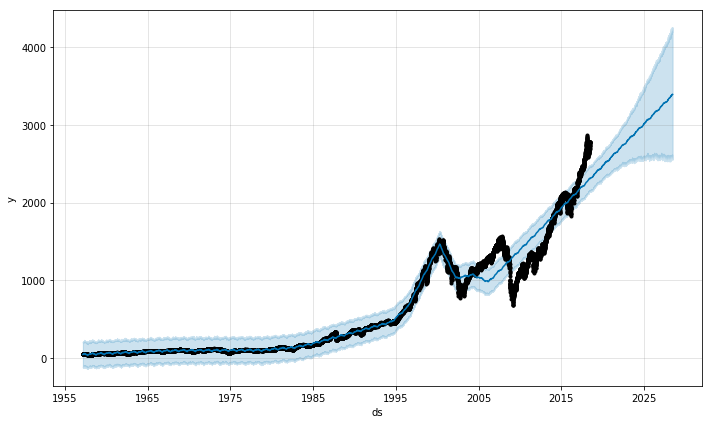

In [40]:
fig1 = m.plot(forecast)

In [41]:
forecast.shape

(19079, 19)

In [43]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19079 entries, 0 to 19078
Data columns (total 19 columns):
ds                            19079 non-null datetime64[ns]
trend                         19079 non-null float64
yhat_lower                    19079 non-null float64
yhat_upper                    19079 non-null float64
trend_lower                   19079 non-null float64
trend_upper                   19079 non-null float64
additive_terms                19079 non-null float64
additive_terms_lower          19079 non-null float64
additive_terms_upper          19079 non-null float64
weekly                        19079 non-null float64
weekly_lower                  19079 non-null float64
weekly_upper                  19079 non-null float64
yearly                        19079 non-null float64
yearly_lower                  19079 non-null float64
yearly_upper                  19079 non-null float64
multiplicative_terms          19079 non-null float64
multiplicative_terms_lower    19079 

In [50]:
pred = forecast.iloc[profdf.shape[0]:,:]

In [51]:
pred.shape

(3650, 19)

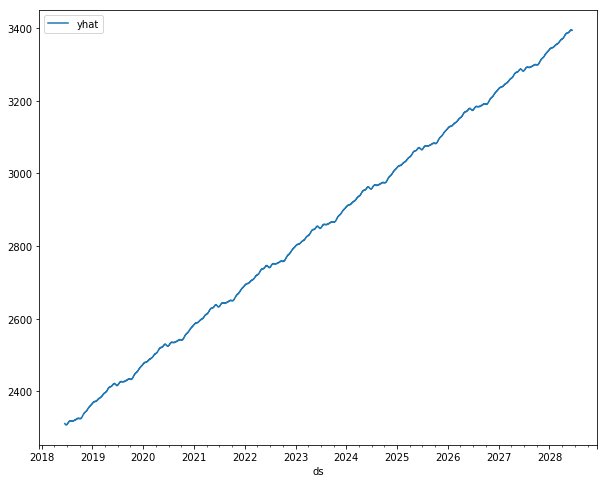

In [63]:
pred.plot("ds","yhat", figsize=(10,8))

In [67]:
profdf['cap'] = 5000
ml = Prophet(growth='logistic')
ml.fit(profdf)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Rajiv\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


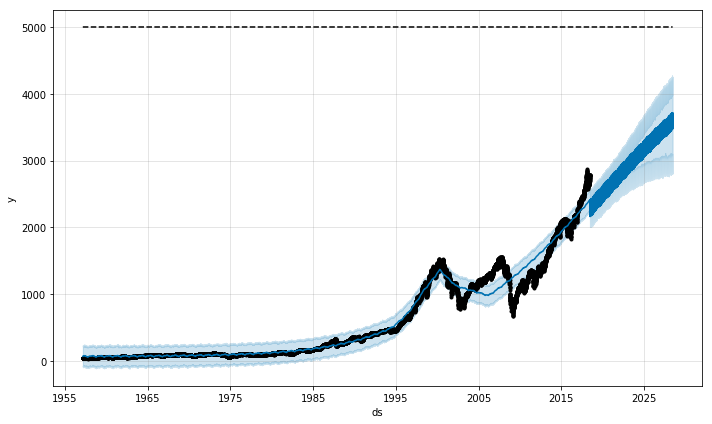

In [68]:
future = ml.make_future_dataframe(periods=3650)
future['cap'] = 5000
fcst = ml.predict(future)
fig = ml.plot(fcst)

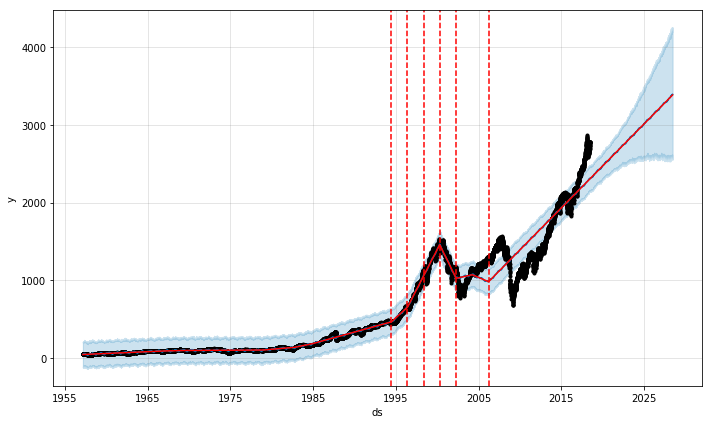

In [69]:
from fbprophet.plot import add_changepoints_to_plot
fig = ml.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), ml, forecast)